## Ejemplos del apartado 1_5 de aprendizaje supervisado

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#print(data['DESCR'])  # Descripción del conjunto de datos
print(data.DESCR)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
features = pd.DataFrame(data=data.data, columns=data.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data.target # Variable objetivo (especies de iris). No está en el formato DataFrame

In [ ]:
target = pd.DataFrame(data=data.target, columns=['species']) # Convertir a DataFrame para facilitar su manejo
target

In [12]:
iris = pd.concat([features, target], axis=1) # Combinar características y variable objetivo en un solo DataFrame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
#iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapear números a nombres de especies
iris['species'] = iris.species.map(lambda x: data.target_names[x])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Análisis de los valores faltantes


In [17]:
iris.info() # Información general sobre el DataFrame, incluyendo tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isna().sum() # Comprobar si hay valores nulos en el DataFrame

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [18]:
iris.describe() # Estadísticas descriptivas del DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.corr(numeric_only=True) # Matriz de correlación entre las características numéricas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [21]:
iris.groupby('species').size() # Conteo de instancias por especie

species
setosa        50
versicolor    50
virginica     50
dtype: int64

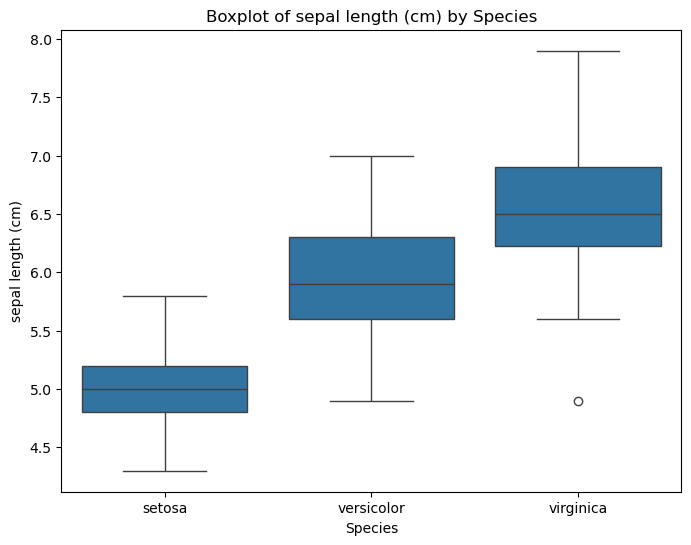

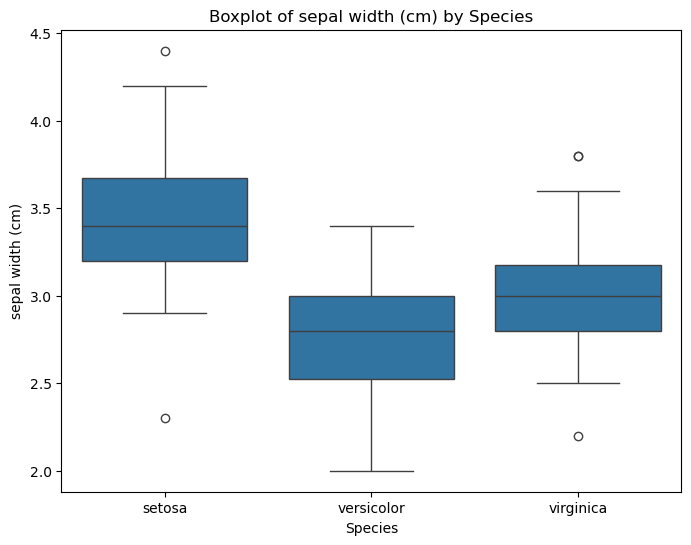

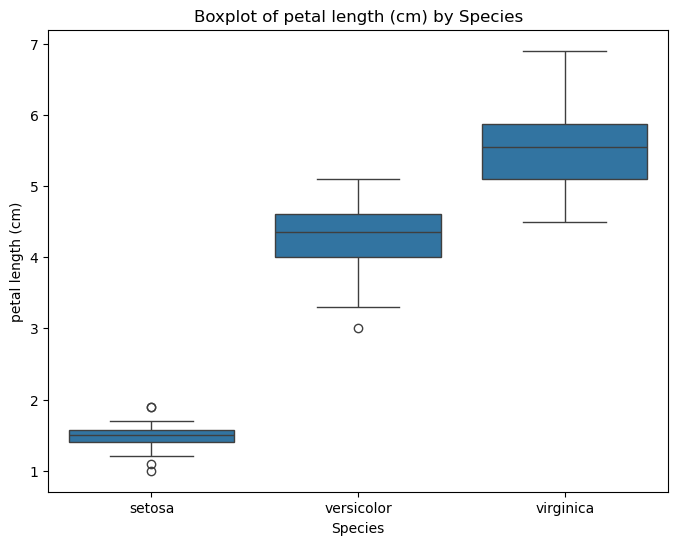

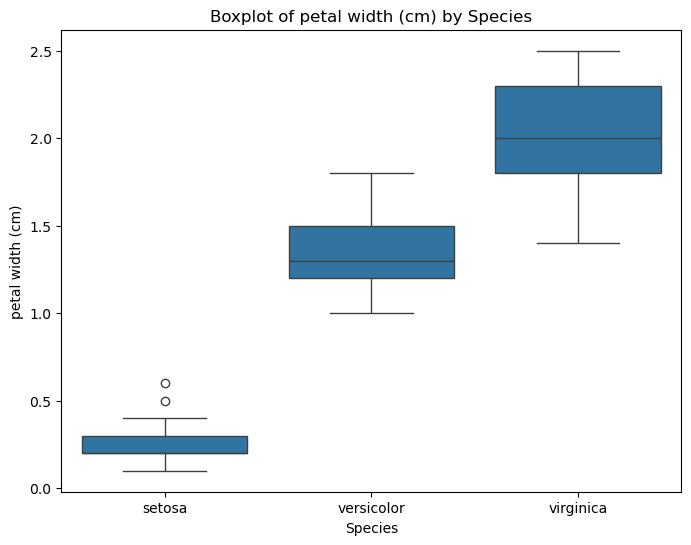

In [ ]:
# Muestra boxplots de cada característica individualmente por especie
def boxplot_features(dataframe, features, target):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target, y=dataframe[feature])
        plt.title(f'Boxplot of {feature} by Species')
        plt.xlabel('Species')
        plt.ylabel(feature)
        plt.show()
boxplot_features(iris, data.feature_names, iris['species'])

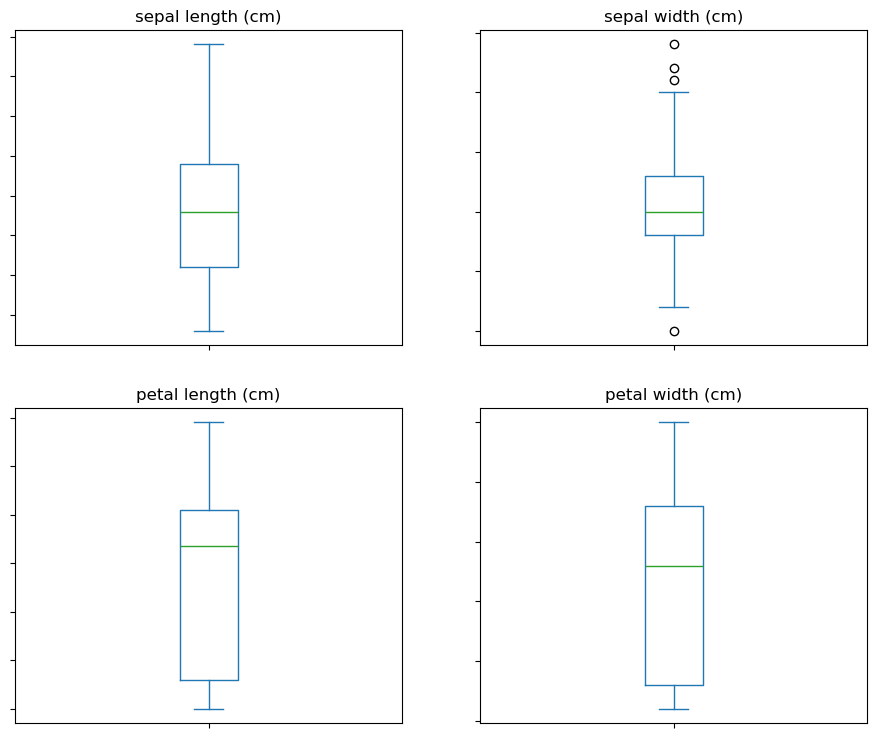

In [ ]:
# Muestra boxplots de cada característica individualmente
def boxplot_iris(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False,
                        labeltop=False, labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind='box', subplots=True, sharex=False)
        plt.title(col)
        i += 1
    plt.show()
boxplot_iris(iris.columns[:-1], iris)

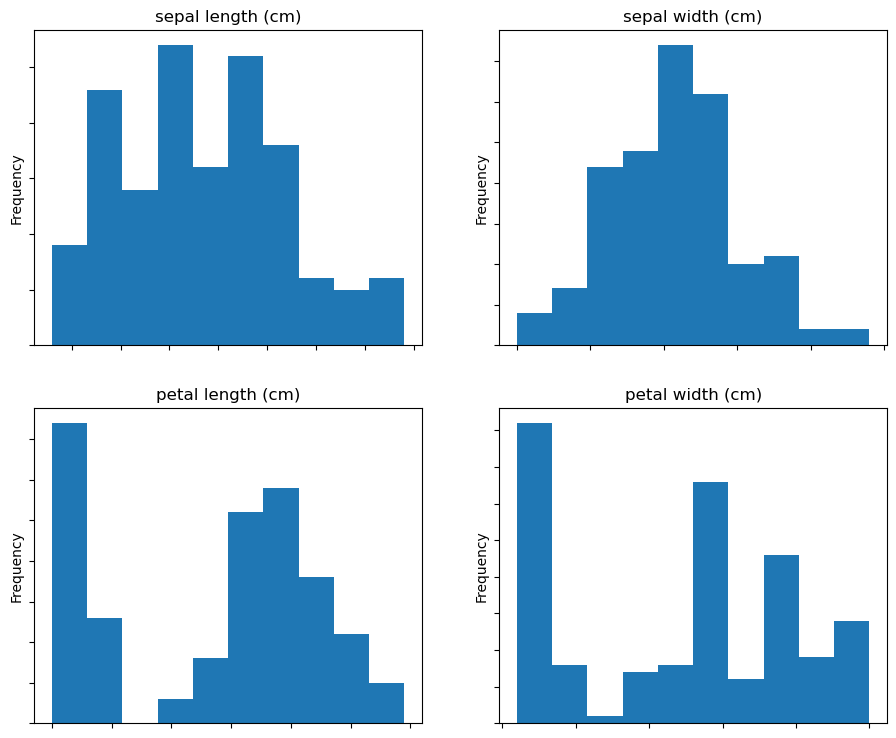

In [25]:
def histogram_iris(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False,
                        labeltop=False, labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind='hist', bins=10)
        plt.title(col)
        i += 1
    plt.show()
histogram_iris(iris.columns[:-1], iris)

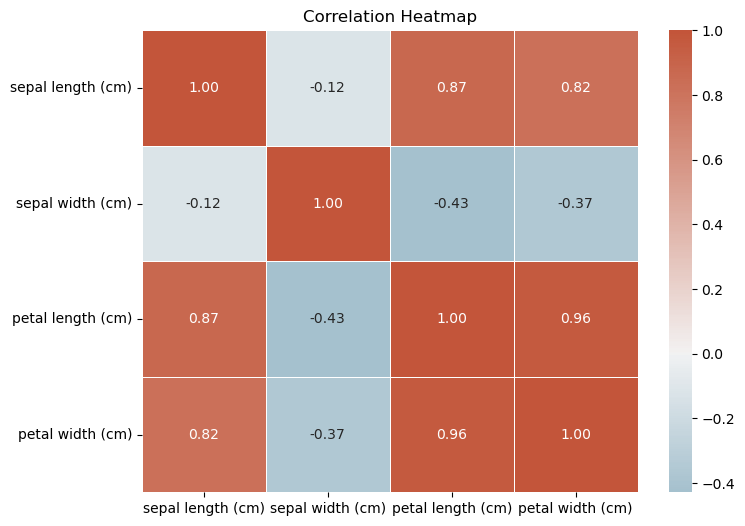

In [26]:
# Mapa de calor de la matriz de correlación
corr = iris.corr(numeric_only=True)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

[]

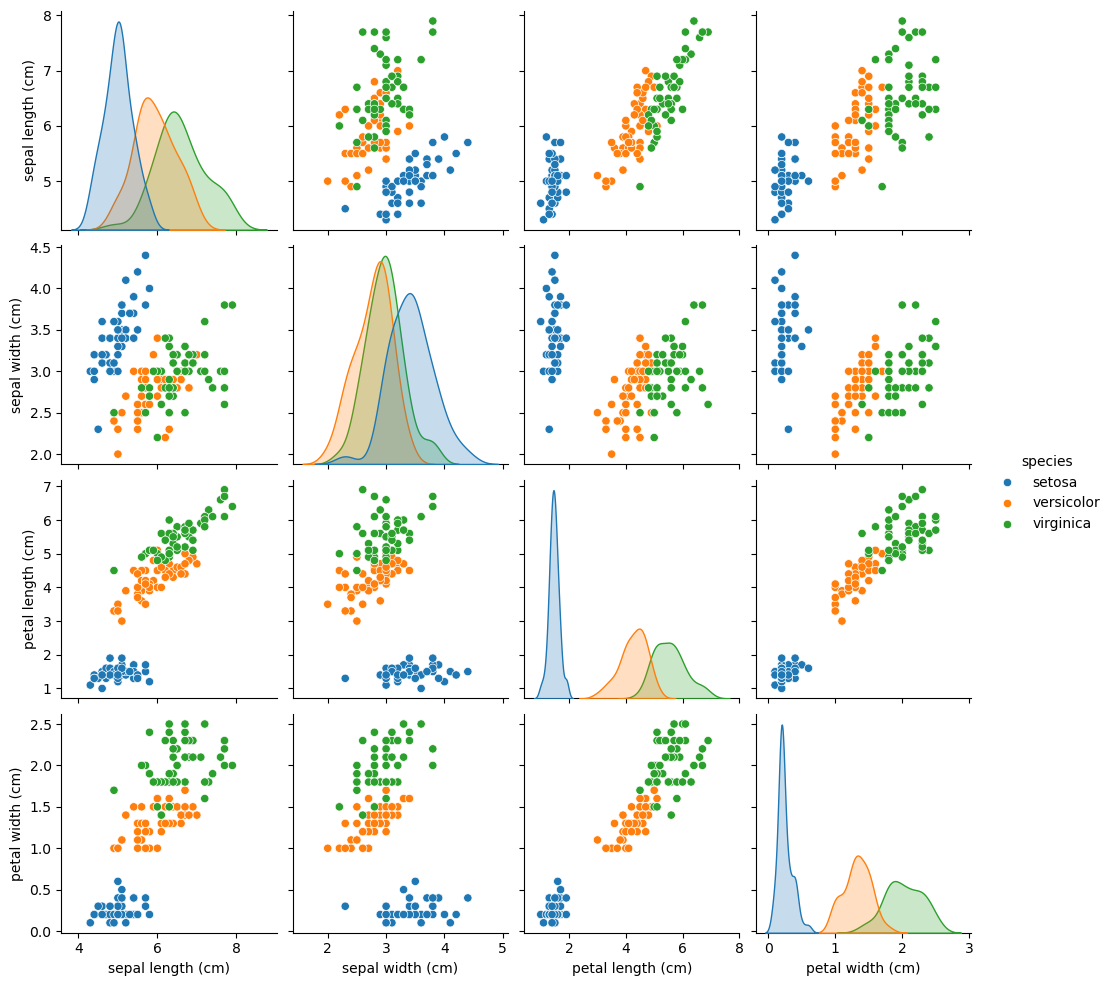

In [27]:
sns.pairplot(iris, hue='species')
plt.plot()

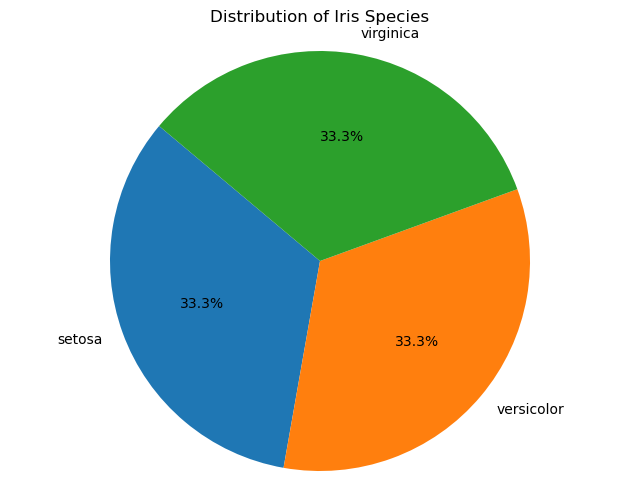

In [29]:
def piechar_iris(target_column,titulo):
    species_counts = target_column.value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
piechar_iris(iris['species'],'Distribution of Iris Species')

## Dividir el dataset en datos de entrenamiento y test

In [30]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop('species', axis=1),  # Características. No modifica el DataFrame original y coge todas las columnas menos 'species'   
    iris['species'],                # Variable objetivo. Coge la columna 'species'
    test_size=0.20,                 # 20% para test
    random_state=42                 # Semilla para reproducibilidad
)
#X_train, X_test, y_train, y_test = train_test_split(
#    iris.iloc[:, :-1],  # Características. No modifica el DataFrame original y coge todas las columnas menos 'species'   
#    iris.iloc[:,-1],                # Variable objetivo. Coge la columna 'species'
#    test_size=0.2,                 # 20% para test
#    random_state=42                 # Semilla para reproducibilidad
#)

### Ejijo el algoritmo de clasificación

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42) # Crear el modelo de árbol de decisión

### Realizo el entrenamiento

In [45]:
model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

DecisionTreeClassifier(random_state=42)

### Obtener métricas de resultado

In [46]:
model.score(X_test, y_test)  # Evaluar el modelo con los datos de prueba

1.0

## Ejemplo de Cross Validation

In [55]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold # Importar KFold para validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42) # Crear objeto KFold con 10 particiones
model = DecisionTreeClassifier(random_state=42) # Crear el modelo de árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),iris['species'],test_size=0.20,random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv)
np.mean(scores)

0.9333333333333333

In [ ]:
for i, _ in enumerate(scores):  # Imprimir la puntuación de cada fold
    print(f"Fold {i+1}: {scores[i]:.4f}")

Fold 1: 0.8333
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 0.8333
Fold 6: 1.0000
Fold 7: 0.8333
Fold 8: 0.8333
Fold 9: 1.0000
Fold 10: 1.0000


### Stratified K-Fold Cross Validation

In [ ]:

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42) # Crear el modelo de árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),iris['species'],test_size=0.20,random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv)
np.mean(scores)

In [58]:
for i, _ in enumerate(scores):  # Imprimir la puntuación de cada fold
    print(f"Fold {i+1}: {scores[i]:.4f}")

Fold 1: 0.9167
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 0.9167
Fold 5: 0.9167
Fold 6: 0.8333
Fold 7: 1.0000
Fold 8: 1.0000
Fold 9: 0.9167
Fold 10: 0.8333


In [59]:
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold # Importar KFold para validación cruzada

data = load_iris()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['species']) # Convertir a DataFrame para facilitar su manejo
iris = pd.concat([features, target], axis=1) # Combinar características y variable objetivo en un solo DataFrame
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42) # Crear el modelo de árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),iris['species'],test_size=0.20,random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv)
np.mean(scores)

0.9333333333333333

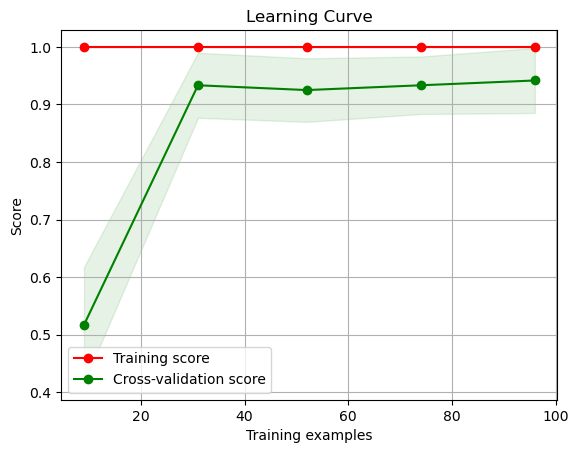

In [7]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.estimators.plot_learning_curve(model, X_train, y_train)
plt.show()


### Hiperparámetros

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [42,1234,4321]
}
model2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=KFold(n_splits=5), n_jobs=-1, scoring='accuracy')
model2.fit(X_train, y_train)
model2.best_params_  # Mostrar los mejores hiperparámetros encontrados


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'random_state': 1234}

In [9]:
model2.best_estimator_

DecisionTreeClassifier(random_state=1234)

In [10]:
model2.best_score_

0.9416666666666668

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred))
print("Accuracy Score:")
print(accuracy_score(y_test, pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score:
1.0
